In [1]:
from matplotlib import pyplot as plt
from matplotlib import animation

import networkx as nx
import numpy as np
import numpy.ma as ma
import pandas as pd

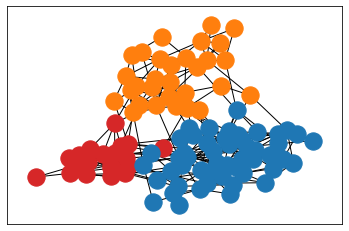

In [70]:
sizes = [20, 50, 30]
probs = [[0.25,0.01, 0.01], [0.01, 0.1, 0.01], [0.01, 0.01, 1/6]]

# track the boundaries between communities
# instead of the size
transitions = np.array(sizes)

for i in range(len(transitions)-1):
    transitions[i + 1] = transitions[i + 1] + transitions[i]
    

G = nx.stochastic_block_model(sizes, probs, seed=31)
A = nx.convert_matrix.to_numpy_matrix(G)

pos = nx.spring_layout(G, seed=3113794652)
nx.draw_networkx_nodes(G, pos, nodelist=range(transitions[0]), node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=range(transitions[0], transitions[1]), node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=range(transitions[1], 100), node_color="tab:orange")
nx.draw_networkx_edges(G, pos)

# Run the simulation without the small random restart probability.
Does the deterministic scenario settle into periodic behavior

In [12]:
rng = np.random.default_rng(11235813)

def run_sim(n_iter, X, eps, M, minfriends, minbad):
    Xs = [X]
    for _ in range(n_iter):
        if X.sum() < M:
            # go if enough of your friends went last week
            # whether or not you went
            X = (A.dot(X) > minfriends)
        else:
            X = (A.dot(X) > minbad)

        X += rng.uniform(size=(100,1)) < eps
        Xs.append(X)
    return np.hstack(Xs)

In [14]:
rng = np.random.default_rng(11235813)

eps = 0
M = 60
minfriends = 2
minbad = 5
n_iter = 1000

Xnps = []
for i in range(30):
    X = rng.uniform(size=(100,1)) < 0.3
    Xnps.append(
        run_sim(n_iter, X, eps, M, minfriends, minbad))
    print(f"Ran simulation {i}")

Ran simulation 0
Ran simulation 1
Ran simulation 2
Ran simulation 3
Ran simulation 4
Ran simulation 5
Ran simulation 6
Ran simulation 7
Ran simulation 8
Ran simulation 9
Ran simulation 10
Ran simulation 11
Ran simulation 12
Ran simulation 13
Ran simulation 14
Ran simulation 15
Ran simulation 16
Ran simulation 17
Ran simulation 18
Ran simulation 19
Ran simulation 20
Ran simulation 21
Ran simulation 22
Ran simulation 23
Ran simulation 24
Ran simulation 25
Ran simulation 26
Ran simulation 27
Ran simulation 28
Ran simulation 29


In [30]:
# skip first 50 rounds to give time to settle
attendance = [np.where(Xnp[:,50:]) for Xnp in Xnps]
ppl = [pd.Series(a[0]) for a in attendance]

cnts = pd.DataFrame(index=range(100))
for i in range(30):
    cnts[i] = ppl[i].value_counts()
    
cnts

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,...,NaN,951.0,NaN,951.0,951.0,951.0,NaN,NaN,951.0,NaN
1,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,...,NaN,951.0,NaN,951.0,951.0,951.0,NaN,NaN,951.0,NaN
2,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,...,NaN,951.0,NaN,951.0,951.0,951.0,NaN,NaN,951.0,NaN
3,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,...,NaN,951.0,476.0,951.0,951.0,951.0,NaN,NaN,951.0,NaN
4,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,951.0,...,NaN,951.0,476.0,951.0,951.0,951.0,NaN,NaN,951.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,951.0,NaN,NaN,951.0,951.0,NaN,951.0,476.0,...,951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,476.0,NaN,NaN,NaN,...,951.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
cnts.loc[20,0]

475.0

In [45]:
ppl[0].value_counts()

0     951
1     951
14    951
13    951
12    951
11    951
10    951
25    951
9     951
8     951
7     951
6     951
5     951
68    951
4     951
19    951
3     951
2     951
17    951
15    951
43    476
20    475
dtype: int64

Ok a few questions here.

1.  That periodicity thing I keep thinking about but still haven't tracked down
2.  Frequency distribution among nodes-- are the same ones usually always/never?
3.  Relationship to community membership
4.  Relationship to degree

In [53]:
Xnps[0][20, -10:]

matrix([[ True, False,  True, False,  True, False,  True, False,  True,
         False]])

In [52]:
Xnps[0][43, -10:]

matrix([[False,  True, False,  True, False,  True, False,  True, False,
          True]])

Woohoo we have periodicity!  Why does it happen at these particular nodes?

Let's have a look (and maybe pimp out the animate function while we are at it)

{20: Text(0.16132287285404365, -0.1564554448533781, '20'),
 43: Text(0.23424246672041482, -0.29034854752009387, '43')}

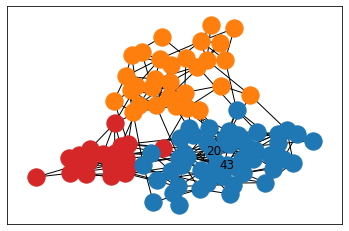

In [54]:
nx.draw_networkx_nodes(G, pos, nodelist=range(0,sizes[0]), node_color="tab:red")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0], sizes[0]+sizes[1]), node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, nodelist=range(sizes[0]+sizes[1], 100), node_color="tab:orange")
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, labels={20:20, 43:43})

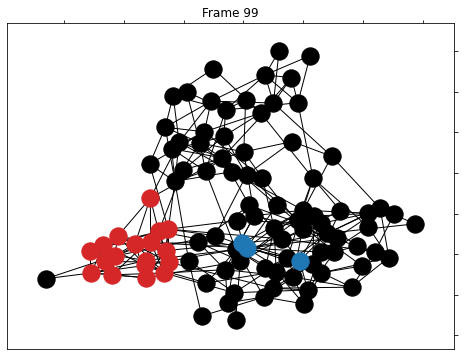

In [55]:
def animate_step(t, Xnp, pos, G, ax):
    ax.clear()

    went = np.where([Xnp[:,t]])[1]
    home = np.where([1 - Xnp[:,t]])[1]

    nx.draw_networkx_nodes(G, pos, nodelist=home, node_color="black")

    colors = ["tab:red", "tab:blue", "tab:orange"]

    for i, c in enumerate(colors):
        # which members of group i went?
        mask = went < transitions[i]

        if i > 0:
            mask = np.logical_and(mask, went > transitions[i-1])

        nx.draw_networkx_nodes(G, pos, nodelist=went[np.where(mask)], node_color=c)

    nx.draw_networkx_edges(G, pos)

    # Set the title
    ax.set_title("Frame {}".format(t))
    
    
def make_animation(Xnp, title):
    fig, ax = plt.subplots(figsize=(8,6))
    ani = animation.FuncAnimation(fig, animate_step, frames=Xnp.shape[1], fargs=(Xnp, pos, G, ax))
    ani.save(title, writer="pillow")
    
    
make_animation(Xnps[0][:,-100:], "../images/strategy_deterministic_trial_0.gif")

Okay so in this case, the periodicity is like a game of telephone tag.  Node 20 goes because they think their friend 43 will be there, but they aren't.  Then node 43 goes because they think that node 20 will be there but they aren't.  Let's look at an example with more periodic nodes.

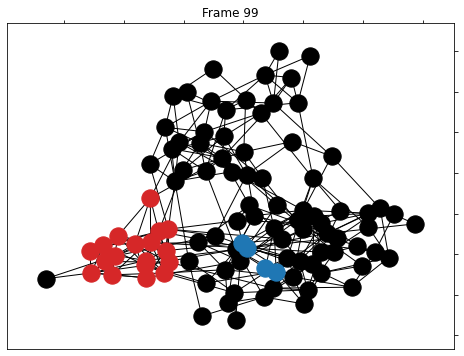

In [57]:
make_animation(Xnps[1][:,-100:], "../images/strategy_deterministic_trial_1.gif")

In [58]:
ppl[1].value_counts()

0     951
6     951
14    951
13    951
12    951
11    951
10    951
9     951
1     951
7     951
8     951
5     951
68    951
4     951
19    951
3     951
2     951
17    951
15    951
37    476
25    476
51    476
42    475
58    475
43    475
28    475
dtype: int64

This is the telephone tag again...

I wonder if anything has period greater than 2?

In [63]:
(cnts < 475).any().any()

False

Welp... there's a quick answer.  I think in principle it could happen though...

Anyway, periodicity has been found.  Now let's look at the distribution of sometimes/always/never across trials

## Community 0

In [67]:
cnts.mean(axis=1)[:20]

0     928.333333
1     889.000000
2     951.000000
3     871.791667
4     889.000000
5     907.727273
6     907.818182
7     951.000000
8     888.956522
9     928.333333
10    888.956522
11    889.000000
12    907.818182
13    929.409091
14    871.708333
15    907.818182
16    611.285714
17    928.380952
18           NaN
19    888.913043
dtype: float64

In [68]:
cnts.mean(axis=1)[20:70]

20    772.625000
21    476.000000
22    594.500000
23           NaN
24    475.750000
25    845.444444
26    475.000000
27    633.666667
28    570.400000
29           NaN
30    476.000000
31    476.000000
32    634.000000
33    475.500000
34    475.000000
35           NaN
36    475.000000
37    594.750000
38    475.250000
39    476.000000
40           NaN
41           NaN
42    570.200000
43    739.555556
44    475.500000
45    475.000000
46    475.000000
47           NaN
48    475.750000
49    476.000000
50    475.500000
51    594.750000
52           NaN
53    713.500000
54           NaN
55           NaN
56           NaN
57    594.250000
58    594.000000
59    634.000000
60           NaN
61    475.500000
62    476.000000
63    475.000000
64    832.000000
65    476.000000
66           NaN
67           NaN
68    907.772727
69    713.500000
dtype: float64

In [69]:
cnts.mean(axis=1)[70:]

70    903.500000
71    907.727273
72    634.000000
73    907.818182
74    855.900000
75    855.900000
76    898.222222
77    907.727273
78           NaN
79    864.545455
80           NaN
81           NaN
82    634.333333
83    855.900000
84    476.000000
85    476.000000
86           NaN
87    594.250000
88           NaN
89    907.727273
90           NaN
91    760.800000
92    475.000000
93    903.500000
94    898.111111
95    907.818182
96    633.666667
97    634.000000
98    760.800000
99    594.750000
dtype: float64

In [104]:
c3s = []
for i in range(30):
    if Xnps[i][70:,-100:].sum() > 0:
        c3s.append(i)
        
c3s

[2, 5, 6, 8, 9, 11, 12, 14, 16, 18, 20]

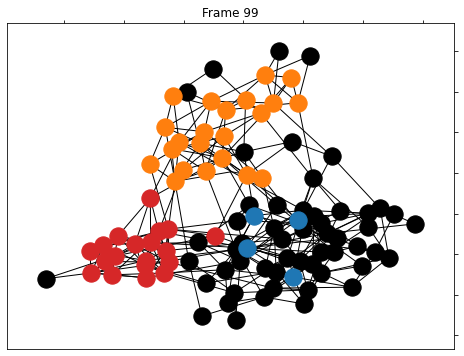

In [108]:
make_animation(Xnps[18][:,-100:], "../images/strategy_deterministic_trial_18.gif")

Okay, well, I forget exactly what I was going for here, but yes, community 3 can contain always and alternate in some trials.  In others it doesn't.

In each trial, some nodes are always, sometimes or never.  Between trials, some nodes are always always, some are sometimes always, and some are never always.  Likewise for the other two.

But WHICH nodes and WHY????

In [116]:
pd.Series(np.ravel(cnts.fillna(0).values)).value_counts()

0.0      2275
951.0     547
476.0      91
475.0      87
dtype: int64

In [148]:
cnts["Always"] = (cnts==951).mean(axis=1)
cnts["Sometimes"] = (cnts < 951).mean(axis=1)
cnts["Never"] = cnts.isna().mean(axis=1)
cnts["Degree"] = pd.Series({node:val for (node, val) in G.degree()})

In [150]:
cnts[["Always", "Sometimes", "Never", "Degree"]].corr()

,Always,Sometimes,Never,Degree
Always,1.000000,0.109685,-0.985334,0.557069
Sometimes,0.109685,1.000000,-0.277682,0.444690
Never,-0.985334,-0.277682,1.000000,-0.614751
Degree,0.557069,0.444690,-0.614751,1.000000


<AxesSubplot:xlabel='Degree', ylabel='Always'>

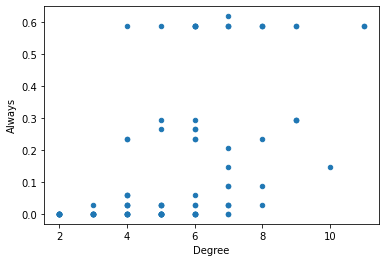

In [151]:
cnts.plot(kind="scatter", x="Degree", y="Always")

<AxesSubplot:xlabel='Degree', ylabel='Sometimes'>

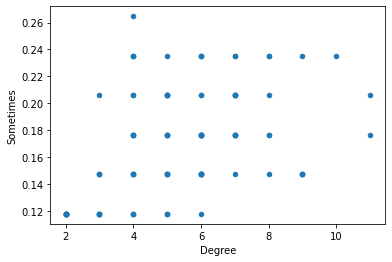

In [152]:
cnts.plot(kind="scatter", x="Degree", y="Sometimes")

<AxesSubplot:xlabel='Degree', ylabel='Never'>

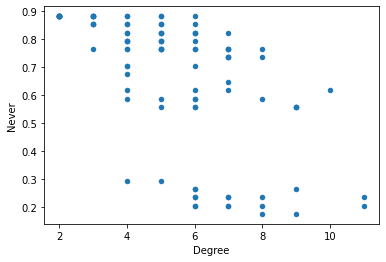

In [153]:
cnts.plot(kind="scatter", x="Degree", y="Never")

Okay so higher degree is unsurprisingly more correlated with Always.  Can I do some actual math here?  Assuming a configuration model to start, then we can do community structure.  On all-to-all network everyone would go and everyone would regret it.

Also... what am I envisioning now for the rest of this project?

1. Derive a formula for expected nodes going.  Solve for optimal solution.
2. Allow the system to evolve.  Do they match?
3. What is the impact of heat on trials?  Is there a tradeoff between heat and evolution?  Can we make a heat an evolutionary parameter?

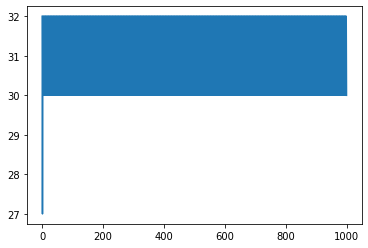

In [161]:
plt.plot(np.ravel(Xnps[3].sum(axis=0)))

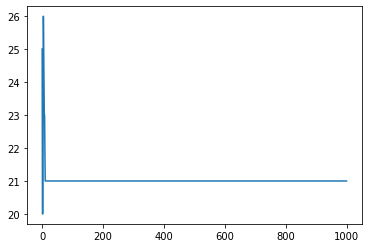

In [163]:
plt.plot(np.ravel(Xnps[0].sum(axis=0)))

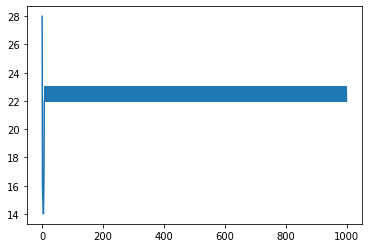

In [164]:
plt.plot(np.ravel(Xnps[1].sum(axis=0)))

Wait is there more than one stable subset of everyone going or just one?

In [174]:
stable = np.where(cnts.min() == 951)
stable

(array([ 2,  4,  5,  7, 17, 21, 24, 28]),)

In [190]:
set(cnts[cnts[2]==951].index.values) == set(cnts[cnts[5]==951].index.values)

True

In [191]:
set(cnts[cnts[2]==951].index.values) == set(cnts[cnts[4]==951].index.values)

False

In [193]:
[len(cnts[cnts[i]==951].index.values) for i in stable[0]]

[32, 19, 32, 19, 19, 19, 19, 19]

In [198]:
set(cnts[cnts[24]==951].index.values) == set(cnts[cnts[28]==951].index.values)

True

In [200]:
set(cnts[cnts[4]==951].index.values).intersection(set(cnts[cnts[2]==951].index.values)) == set(cnts[cnts[4]==951].index.values)

True

In [209]:
cnts[cnts[2]==951].index.values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 17,
       19, 68, 70, 71, 73, 74, 75, 76, 77, 79, 83, 89, 93, 94, 95])

There are two fixed points that were found here.  One is a subset of the other.

Theoretically, groups of alternating nodes should support each other.  What happens if we take conditions with sometimeses and set them all to attend in the same week?

In [211]:
X = np.zeros(shape=(100,1),dtype=bool)
X[np.where(~cnts[0].isna())[0]] = True
Xnp = run_sim(n_iter, X, eps, M, minfriends, minbad)

In [213]:
Xnp.mean(axis=0)

matrix([[0.22, 0.22, 0.22, ..., 0.22, 0.22, 0.22]])

In [219]:
for col in range(len(Xnp)):
    if (Xnp[:,0] != Xnp[:,col]).all():
        print(col)

In [221]:
set(np.where(~cnts[0].isna())[0])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 25, 43, 68}

In [222]:
len(set(np.where(~cnts[0].isna())[0]))

22

Great!  We have new fixed point that couldn't stabilize itself before!  It's still a subset of the big one.

Now let's look at one that involved community #3.  This one won't be a subset of the big group.

In [223]:
X = np.zeros(shape=(100,1),dtype=bool)
X[np.where(~cnts[18].isna())[0]] = True
Xnp = run_sim(n_iter, X, eps, M, minfriends, minbad)
Xnp.mean(axis=0)

matrix([[0.51, 0.51, 0.51, ..., 0.51, 0.51, 0.51]])

In [224]:
for col in range(len(Xnp)):
    if (Xnp[:,0] != Xnp[:,col]).all():
        print(col)

In [229]:
np.where(~cnts[18].isna())[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 19, 30, 31, 34, 36, 42, 63, 65, 68, 70, 71, 72, 73, 74, 75, 76,
       77, 79, 82, 83, 84, 85, 87, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Okay this is a fixed point too we just didn't converge to it.

Just for fun....  test with minfriends = 3
I think this might be always empty unless we crank up the degree a lot.

In [230]:
rng = np.random.default_rng(11235813)

eps = 0
M = 60
minfriends = 3
minbad = 5
n_iter = 1000

Xnps = []
for i in range(30):
    X = rng.uniform(size=(100,1)) < 0.3
    Xnps.append(
        run_sim(n_iter, X, eps, M, minfriends, minbad))
    print(f"Ran simulation {i}")

Ran simulation 0
Ran simulation 1
Ran simulation 2
Ran simulation 3
Ran simulation 4
Ran simulation 5
Ran simulation 6
Ran simulation 7
Ran simulation 8
Ran simulation 9
Ran simulation 10
Ran simulation 11
Ran simulation 12
Ran simulation 13
Ran simulation 14
Ran simulation 15
Ran simulation 16
Ran simulation 17
Ran simulation 18
Ran simulation 19
Ran simulation 20
Ran simulation 21
Ran simulation 22
Ran simulation 23
Ran simulation 24
Ran simulation 25
Ran simulation 26
Ran simulation 27
Ran simulation 28
Ran simulation 29


In [233]:
# skip first 50 rounds to give time to settle
attendance = [np.where(Xnp[:,50:]) for Xnp in Xnps]
ppl = [pd.Series(a[0]) for a in attendance]

cnts = pd.DataFrame(index=range(100))
for i in range(30):
    cnts[i] = ppl[i].value_counts()
    
cnts.isna().all().all()

True

Yup this is not stable unless it's way denser.
Let's get my old data back

In [235]:
rng = np.random.default_rng(11235813)

eps = 0
M = 60
minfriends = 2
minbad = 5
n_iter = 1000

Xnps = []
for i in range(30):
    X = rng.uniform(size=(100,1)) < 0.3
    Xnps.append(
        run_sim(n_iter, X, eps, M, minfriends, minbad))

# skip first 50 rounds to give time to settle
attendance = [np.where(Xnp[:,50:]) for Xnp in Xnps]
ppl = [pd.Series(a[0]) for a in attendance]

cnts = pd.DataFrame(index=range(100))
for i in range(30):
    cnts[i] = ppl[i].value_counts()
    
cnts["Always"] = (cnts==951).mean(axis=1)
cnts["Sometimes"] = (cnts < 951).mean(axis=1)
cnts["Never"] = cnts.isna().mean(axis=1)
cnts["Degree"] = pd.Series({node:val for (node, val) in G.degree()})
cnts["Triangles"] = pd.Series(nx.triangles(G))

In [243]:
cnts

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,Always,Sometimes,Never,Degree,Triangles
0,951.0,951.0,951.0,951.0,NaN,951.0,951.0,NaN,951.0,951.0,...,NaN,NaN,NaN,951.0,951.0,0.700000,0.032258,0.28125,9,9
1,951.0,951.0,951.0,951.0,NaN,951.0,951.0,NaN,951.0,951.0,...,NaN,NaN,NaN,951.0,951.0,0.700000,0.064516,0.25000,7,5
2,951.0,951.0,951.0,951.0,NaN,951.0,951.0,NaN,951.0,951.0,...,NaN,NaN,NaN,951.0,951.0,0.700000,0.032258,0.28125,5,4
3,951.0,951.0,951.0,951.0,NaN,951.0,951.0,NaN,951.0,951.0,...,NaN,476.0,NaN,951.0,951.0,0.700000,0.129032,0.18750,8,1
4,951.0,951.0,951.0,951.0,NaN,951.0,951.0,NaN,951.0,951.0,...,NaN,NaN,NaN,951.0,951.0,0.700000,0.032258,0.28125,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,951.0,NaN,475.0,NaN,NaN,951.0,951.0,NaN,NaN,951.0,...,951.0,951.0,NaN,475.0,NaN,0.366667,0.161290,0.46875,6,5
96,NaN,NaN,NaN,NaN,NaN,476.0,951.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.066667,0.096774,0.81250,5,3
97,NaN,NaN,NaN,NaN,NaN,475.0,475.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.033333,0.129032,0.81250,4,1
98,NaN,NaN,NaN,NaN,NaN,951.0,951.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.133333,0.032258,0.81250,7,4


In [246]:
cnts[["Always", "Triangles", "Degree"]].corr()

,Always,Triangles,Degree
Always,1.000000,0.726653,0.577859
Triangles,0.726653,1.000000,0.606032
Degree,0.577859,0.606032,1.000000


<AxesSubplot:xlabel='Triangles', ylabel='Always'>

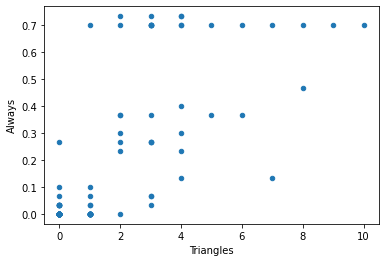

In [248]:
cnts.plot(kind="scatter", x="Triangles", y="Always")

More triangles --> More attendance

There isn't going to be a nice formula here I don't think.  But can we relate the number of triangles in the I.C. to the eventual state?

In [256]:
nx.triangles(G.subgraph(np.where(Xnps[0][:,0])[0]))

{2: 0,
 7: 0,
 8: 0,
 13: 0,
 14: 0,
 17: 0,
 22: 0,
 23: 0,
 26: 0,
 31: 0,
 33: 0,
 39: 0,
 42: 0,
 43: 0,
 47: 0,
 49: 0,
 51: 0,
 53: 0,
 54: 0,
 59: 0,
 60: 0,
 69: 0,
 71: 3,
 72: 0,
 73: 4,
 77: 1,
 89: 3,
 90: 0,
 91: 0,
 95: 4}

In [258]:
nx.triangles(G.subgraph(np.where(Xnps[2][:,0])[0]))

{1: 1,
 3: 1,
 7: 0,
 8: 0,
 10: 0,
 14: 1,
 19: 0,
 20: 0,
 21: 0,
 25: 0,
 27: 0,
 30: 0,
 31: 0,
 41: 0,
 46: 0,
 48: 0,
 50: 0,
 54: 0,
 55: 0,
 58: 0,
 65: 0,
 73: 0,
 74: 0,
 75: 0,
 89: 0,
 92: 0,
 94: 0,
 98: 0}

In [264]:
cnts["eigenvec"] = pd.Series(nx.algorithms.centrality.eigenvector_centrality(G))
cnts[["Always", "Triangles", "eigenvec"]].corr()

,Always,Triangles,eigenvec
Always,1.000000,0.726653,0.900292
Triangles,0.726653,1.000000,0.677659
eigenvec,0.900292,0.677659,1.000000


<AxesSubplot:xlabel='eigenvec', ylabel='Always'>

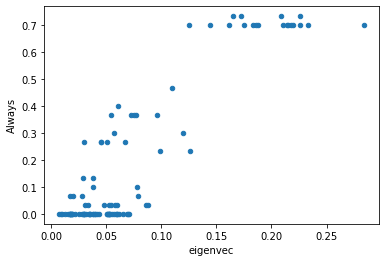

In [265]:
cnts.plot(kind="scatter", x='eigenvec', y="Always")

Okay so eigenvector centrality is the most strongly correlated with Always going.  This isn't surprising.  Does it hold up on other networks?  Specifically ones with larger and more distinct communities?

Also there are so many ideas.  I can't follow all of them.

Take a step back and think some more.

1. There are a lot of potential fixed points but most are not attractors in the cold, deterministic system.
2. Adding noise to the system potentially makes it easier to settle near fixed points (more attendance... no longer true fixed points but they should be attractors now).
3. Noise can lead to jumps into higher utility states.  Sometimes this takes a long time.
4. Evolution?
5. No communities?  Maybe shoulda tried this first.

Xnps